# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, we will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [15]:
# All required libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Preview the dataset
print(crops.head())

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice


In [16]:
# Check for missing values
crops.isnull().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [17]:
# Check the types of data
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [18]:
# Check for duplicates
crops.duplicated().sum()

0

In [19]:
# Check crop types
crops['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [20]:
# Split the data into features (X) and target variable (y)
X = crops.drop('crop', axis=1)
y = crops['crop']

# Split the data into training and test sets (test_size = 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Set the maximum number of iterations for the logistic regression model
max_iter = 2000

# Set the multi-class strategy for the logistic regression model
multi_class = 'multinomial'

# Create a Logistic Regression model with the specified parameters
log_reg = LogisticRegression(max_iter=max_iter, multi_class=multi_class, random_state=42)

# Fit the model using the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       apple       0.57      0.17      0.27        23
      banana       1.00      1.00      1.00        21
   blackgram       0.79      0.55      0.65        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.75      0.67      0.71        27
      coffee       0.88      0.88      0.88        17
      cotton       0.77      1.00      0.87        17
      grapes       0.37      0.79      0.50        14
        jute       0.54      0.65      0.59        23
 kidneybeans       0.43      0.60      0.50        20
      lentil       0.36      0.73      0.48        11
       maize       1.00      0.81      0.89        21
       mango       0.54      0.74      0.62        19
   mothbeans       0.43      0.25      0.32        24
    mungbean       0.46      0.63      0.53        19
   muskmelon       0.53      0.59      0.56        17
      orange       0.88      1.00      0.93        14
    

In [22]:
features = ["N", "P", "K", "ph"]

# Iterate over each feature
for feature in features:
    # Create and fit a Logistic Regression model
    log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial", random_state=42)
    log_reg.fit(X_train[[feature]], y_train)

    # Make predictions
    y_pred = log_reg.predict(X_test[[feature]])

    # Calculate the F1 score for the current feature
    feature_performance = f1_score(y_test, y_pred, average='weighted')

    # Display F1 score for the current feature
    print(f"F1-score for {feature}: {feature_performance}")

F1-score for N: 0.10507916708090527
F1-score for P: 0.10457380486654515
F1-score for K: 0.2007873036107074
F1-score for ph: 0.04532731061152114


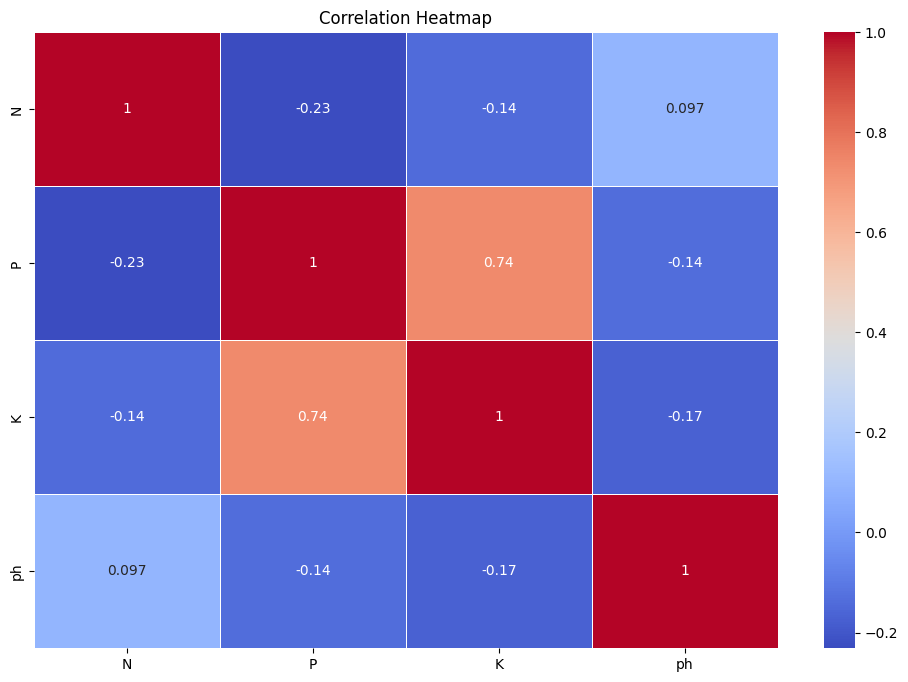

In [23]:
# Calculate the correlation matrix
correlation_matrix = crops.corr()

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

From the heatmap we notice that "P" and "K" are highly correlated (0.74). We aim to select a set of features that are less correlated with each other.

In [24]:
# Define the final features to be used in the model
final_features = ["K", "ph", "N"]

So the final model will have the following process.

In [25]:
# Split the data into features (X) and target variable (y)
X = crops[final_features]
y = crops['crop']

# Split the data into training and test sets (test_size = 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
max_iter = 2000
multi_class = 'multinomial'
log_reg = LogisticRegression(max_iter=max_iter, multi_class=multi_class, random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate the F1 score for the final model
model_performance = f1_score(y_test, y_pred, average='weighted')
print("F1 score for the final model:", round(model_performance, 2))

F1 score for the final model: 0.54
